##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Hier wird ein Neuronales Netzwork Model zur Klassifizierung von Kleidungsbildern, wie Schuhen und T-Shirts genutzt. 

Wir nutzen [tf.keras](https://www.tensorflow.org/guide/keras), eine API um Modelle mit TensoFlow zu bauen und zu modellieren.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Import the Fashion MNIST dataset

Dieses Tutorial nutzt das [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Es enthält 70,000 Graufarbenbilder in 10 Kategorien. Die Bilder zeigen individuelle Kleidungsstücke in niedriger Auflösung (28 mal 28 Pixel), wie zum Beispiel diese hier:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

60,000 Bilder werden genutzt um das Netz zu trainieren und 10,000 Bilder um zu überprüfen wie genau das Netzwerk die Klassen den Bildern zuordnen konnte. Der Zugriff auf das Fashion MNIST dataset erfolgt direkt über TensorFlow. Import und [laden der Fashion MNIST Daten](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) direkt von TensorFlow:

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Das Laden des Datasets gibt vier NumPy arrays zurück:

* Die `train_images` und `train_labels` arrays sind die *Trainingssets*—die daten die das Model nutzt um zu lernen.
* Das Model wird gegen das *Testset* getestet. Diese Daten sind in den `test_images`, und `test_labels` arrays.

Die Bilder sind 28x28 NumPy arrays, mit Pixelwerten die von 0 bis 255 reichen. Die *labels* sind ein array von Ganzzahlen, die von 0 bis 9 reichen. Dies entspricht der *Klasse* der Kleidung, die das Bild repräsentiert:

<table>
  <tr>
    <th>Label</th>
    <th>Klasse</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/Top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hose</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Kleid</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Jacke</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandale</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hemd</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Halbschuh</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Tasche</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Stiefelette</td>
  </tr>
</table>

Jedes Bild hat genau ein Label. Da die *Klassennamen* nicht in den Daten enthalten sind werden sie hier für später abgespeichert:

In [4]:
class_names = ['T-shirt/top', 'Hose', 'Pullover', 'Kleid', 'Jacke',
               'Sandale', 'Hemd', 'Halbschuh', 'Tasche', 'Stiefelette']

## Erkunden der Daten

Wir erkunden das Format des Datasets vor dem Training ein wenig. Im Folgenden wirds gezeigt das wir 60,000 Bilder im Trainingset haben, jedes Bild in 28 x 28 Pixeln:

In [5]:
train_images.shape

(60000, 28, 28)

Ebenso gibt es 60,000 Labels im Trainingsset:

In [6]:
len(train_labels)

60000

Jedes Label ist eine Ganzzahl zwischen 0 und 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Es gibt 10,000 Bilder im Testset. Ebenso wird jedes Bild mit 28 x 28 Pixeln repräsentiert:

In [8]:
test_images.shape

(10000, 28, 28)

Und das Testset enthält 10,000 Label für die Bilder:

In [9]:
len(test_labels)

10000

## Vorverarbeitung der Daten

Die Daten müssen vorverarbeitet werden, bevor wir mit dem Training beginnen können.
Wenn wir uns das erste Bild im Traingsset anschauen, dann sehen wir dass die Pixelwerte in den Bereich von 0 bis 255 fallen:

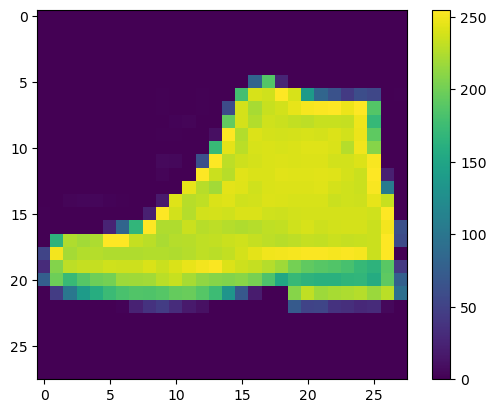

In [10]:
plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.show()

Wir müssen diese Werte auf einen Intervall von 0 bis 1 skalieren. Um das zu realisieren können wir einfach durch 255 teilen. Es ist wichtig beide Sets - *Trainingsset* und *Testset* - auf die selbe Weise zu behandeln:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Um zu überprüfen ob die Daten im korrekten Format vorliegen und wir bereit sind das Netzwerk zu trainieren zeigen wir die Ersten 25 Bilder des *Trainingssets* an und geben die entsprechende Klasse aus.

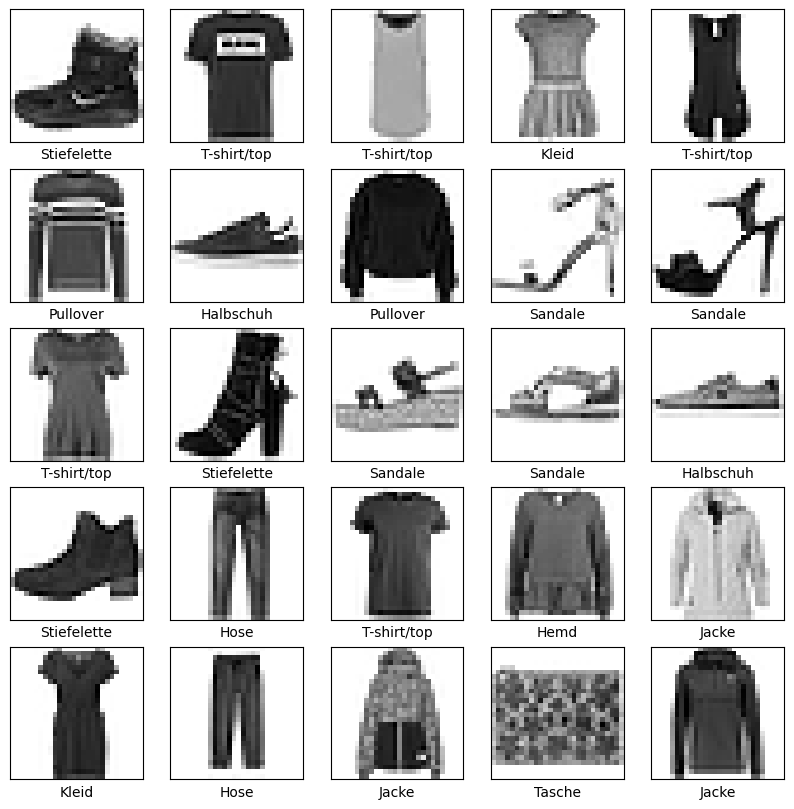

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Bauen des Models

Um das Neuronale Netzwerk zu bauen müssen wir die Schichten des Models festlegen und dann das Model compilieren.

### Die Schichten festlegen

Schichten ([*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers)) sind die Baueinheiten aus denen ein Neuronales Netz besteht. Schichten extrahieren Repräsentationen aus den Daten, die in sie hineinfliessen. Und hoffentlich sind diese Representationen nützlich um unser Problem zu lösen.

Der übliche Ansatz im Deep Learning ist es einfache Schichten hintereinander zu verketten. Viele dieser Schichten (wie etwa `tf.keras.layers.Dense`) haben Parameter die während des Trainings gelernt werden.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-17 19:08:56.517803: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-17 19:08:56.522818: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...



### Compilieren des Models

Um das Model nun für den Trainingsschritt vorzubereiten benötigen wir noch einige Einstellungen.
Diese werden mit der [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) methode des Models gesetzt:


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Trainieren des Models

Das Trainieren des Models benötigt folgende Schritte:

1. Traingsdaten müssen ins Model gebracht werden (`train_images` und `train_labels` arrays).
2. Das Model lernt das die entsprechenden Bilder zu den entsprechenden Labels gehören.
3. Wir werden dann das Model mit den Testdaten füttern und die Vorhersagen des Models anschauen (`test_images` array).
4. Wir überprüfen nun ob die Vorhersagen mit den Labeln übereinstimmen (`test_labels` array).


### Start des Trainings

Um das Training zu beginnen, rufen wir die [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) Methode auf. Diese paßt ("fit") das Model an die Traingsdaten an:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 765us/step - loss: 0.4985 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.3753 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.3359 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.3142 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.2954 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.2805 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.2681 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.2577 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.2469 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 1s 771u

Während das Model trainiert werden für die jeweilige Epoche die Verlust (loss) und Genauigkeit (accuracy) Metriken angezeigt. Dieses Model wird eine Genauigkeit von ca. 0.91 (oder 91%) auf dem Trainingsdatenset erreichen.

### Genauigkeit Abschätzen

Als nächstes vergleichen wir die Genauigkeit mit den Testdaten.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3352 - accuracy: 0.8842 - 143ms/epoch - 456us/step

Test accuracy: 0.8841999769210815


Es stellt sich heraus das die Genauigkeit auf dem Testdatenset etwas niedriger ist als auf den Trainingsdaten.
Dieser Unterschied zwischen Trainingsgenauigkeit und Testgenauigkeit stellt *overfitting* dar.

### Vorhersagen machen

Mit dem trainierten Model können wir es nutzen um die Kategorien von Bildern abzuschätzen.
Das das Model linearen output nutzt ([logits](https://developers.google.com/machine-learning/glossary#logits)) müssen wir eine softmax Schicht anhängen um die logits zu Wahrscheinlichkeiten umzuwandeln, da diese leichter zu interpretieren sind. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 436us/step


Das Model hat jetzt für jedes Bild im Testset eine Vorhersage über die entsprechenden Kategoriezugehörigkeiten gemacht.
Schauen wir uns die Erste an:

In [20]:
predictions[0]

array([6.8398926e-06, 4.1706922e-08, 8.0739483e-08, 1.4793491e-08,
       2.0679845e-08, 5.1395770e-04, 1.3589986e-06, 1.1828074e-02,
       2.2729256e-07, 9.8764938e-01], dtype=float32)

Eine Vorhersage ist ein Array von 10 Nummern.  Diese entsprechen dem Vertrauen das das Model in seine Vorhersage für die entsprechende Kategorie hat. Und nun zeigen wir die Vorhersage mit dem höchsten Vertrauen an:

In [21]:
np.argmax(predictions[0])

9

Das Model ist also der Meinung das es sich hierbei um eine Stiefelette handelt (`class_names[9]`). Wir überprüfen dies mit den Testlabels und stellen fest, dass das korrekt ist:

In [22]:
test_labels[0]

9

Wir erstellen nun Funktionen die uns bei der grafischen Darstellung aller Abschätzungen helfen werden.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

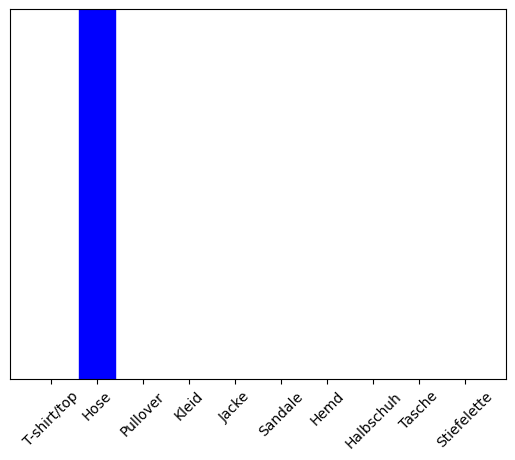

In [25]:
number = 42
plot_value_array(number, predictions[number], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

### Verifizieren der Abschätzungen

Mit dem trainierten Model können wir uns nun einige Abschätzungen anschauen.

Schauen wir das Erste (0) Bild an. Korrekte Vorhersagen sind Blau und Inkorrekte sind Rot. Die Zahl gibt die Prozentzahl des Vertrauens in die Vorhersage an.

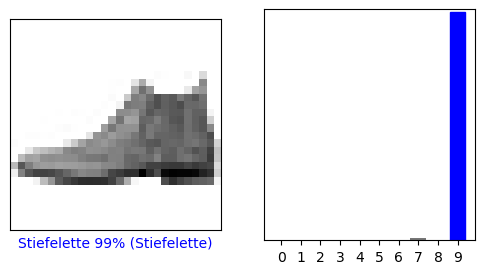

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

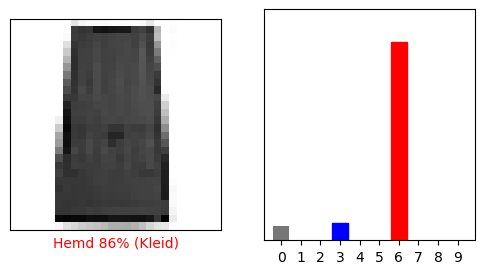

In [27]:
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plotten wir nun einige Vorhersagen.

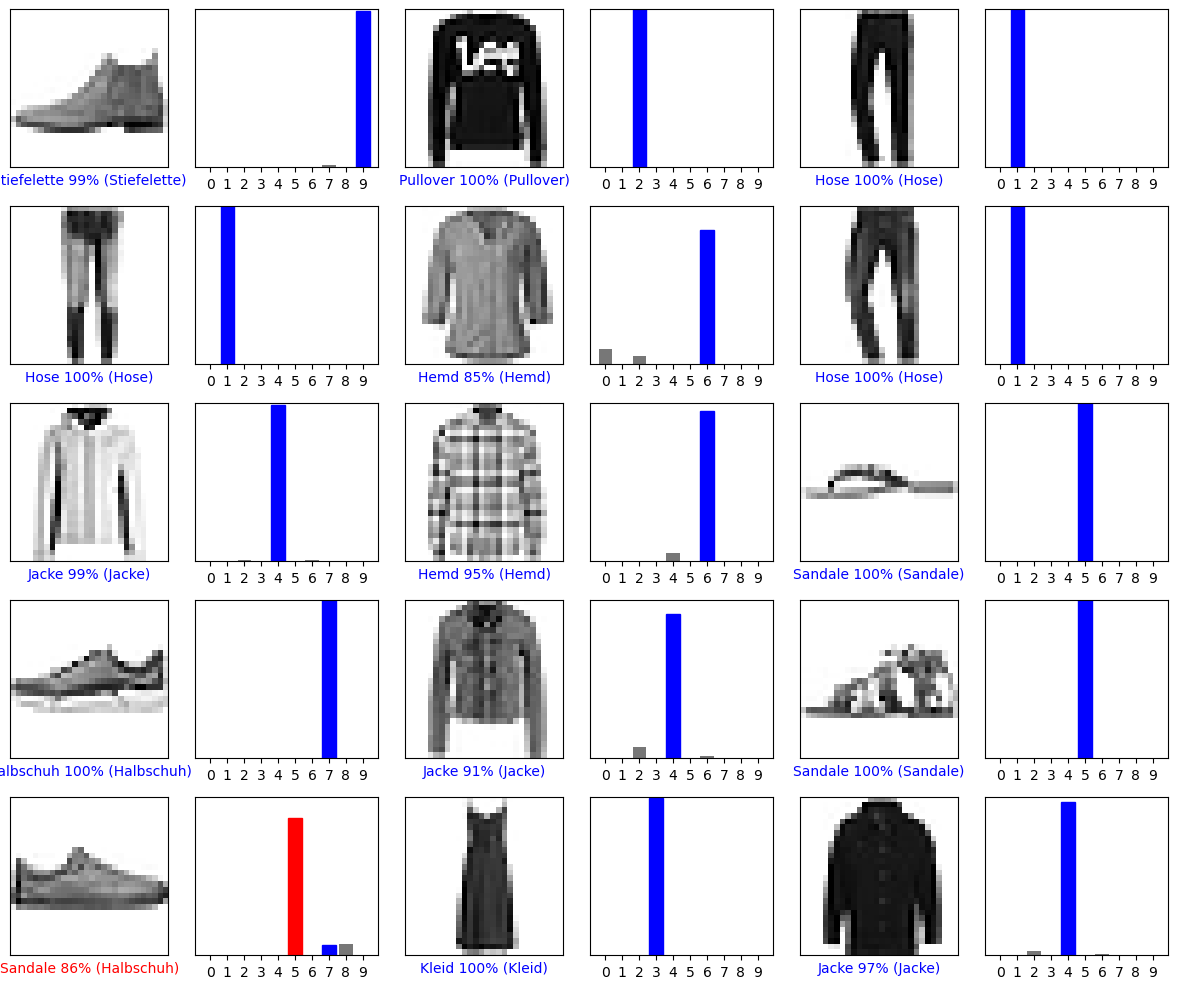

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()